The goal of this project is to characterize the variety of consumers that a wholesale distributor deals with.

**Import Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import plotly.graph_objs as pgo
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [11]:
myData=pd.read_csv("Wholesale customers data.csv")
myData.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are a total of 440 observations and 8 attributes in the dataset. As we can see, every features have 440 non-null means that there are no missing Values

In [13]:
# printing the number of null values in each attribute

myData.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [14]:
myData.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


printing the number of UNIQUE values in each attribute

In [15]:
myData.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

**Data Exploration & Visualization**

In [17]:
myData['Channel'] = myData['Channel'].map({1:'Horeca', 2:'Retail'})
myData['Region'].replace([1,2,3],['Houston','New York','Los Angeles'],inplace=True)
myData

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,NaN,Los Angeles,12669,9656,7561,214,2674,1338
1,NaN,Los Angeles,7057,9810,9568,1762,3293,1776
2,NaN,Los Angeles,6353,8808,7684,2405,3516,7844
3,NaN,Los Angeles,13265,1196,4221,6404,507,1788
4,NaN,Los Angeles,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,NaN,Los Angeles,29703,12051,16027,13135,182,2204
436,NaN,Los Angeles,39228,1431,764,4510,93,2346
437,NaN,Los Angeles,14531,15488,30243,437,14841,1867
438,NaN,Los Angeles,10290,1981,2232,1038,168,2125


In this plot, we have three different cities. Median Los Angeles residents consume 3.6k and Houston 3.7 and New York 2.3k

In [19]:
fig = px.box(myData, x='Region', y='Milk', color='Region')
fig.show()


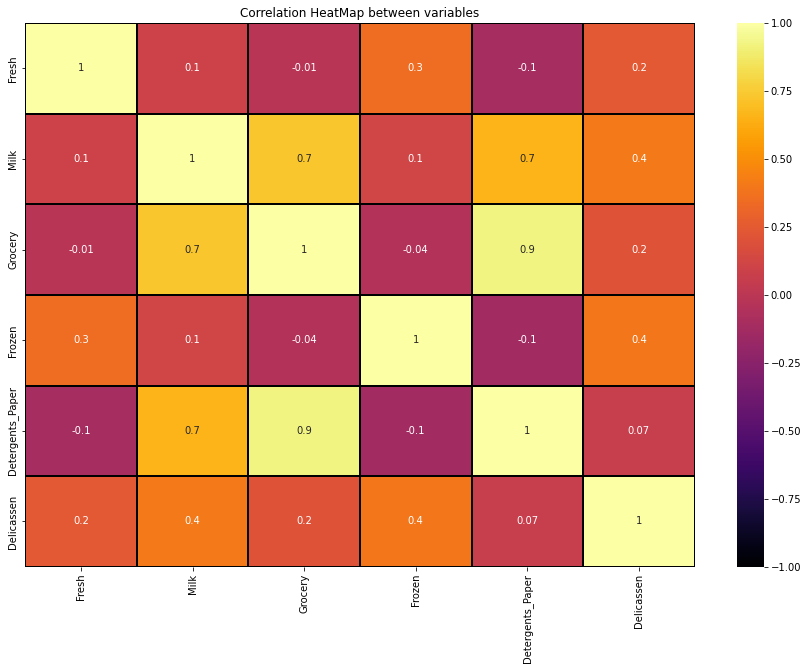

In [20]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(myData.corr(),annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap between variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

The above heatmap shows the correlation between variables on each axis. We observe that there exists severe collinearity issues exist between Milk&Detergents_Paper,Grocery&Detergents_Paper and Milk&Grocery since there are correlations are > 0.7 and >0.9 between the two features.

In [31]:
#Which Region and which Channel seems to spend more? 
#Which Region and which Channel seems to spend less?

myData['Total'] = myData['Fresh'] + myData['Milk'] + myData['Grocery']+ myData['Frozen'] + myData['Detergents_Paper'] + myData['Delicassen']
fig = px.histogram(myData, x="Region", y="Total",color='Channel', barmode='group',histfunc='avg',height=400)
fig.show()

ValueError: ignored

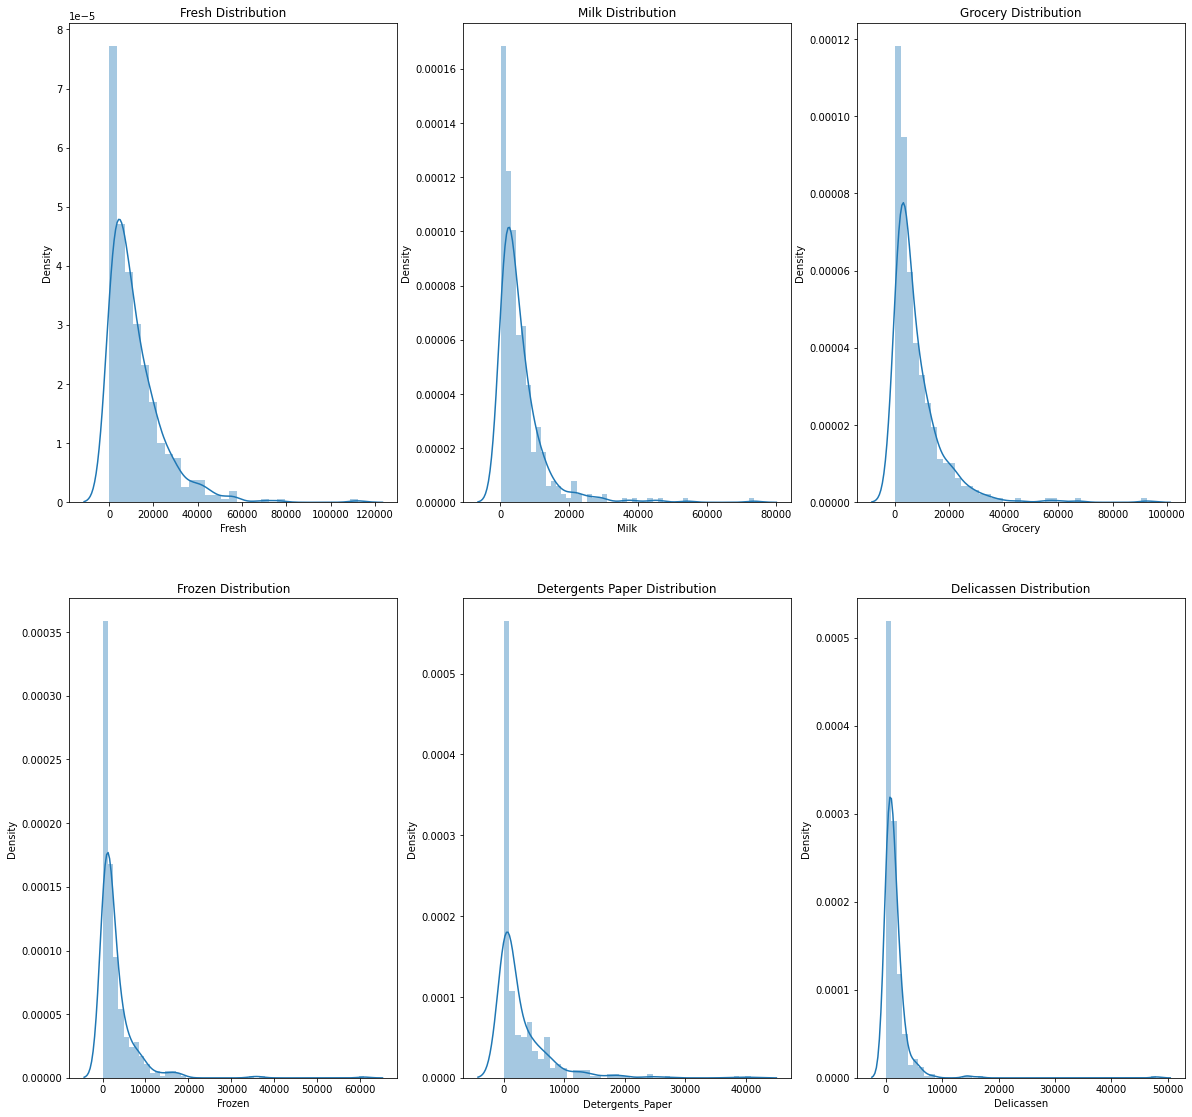

In [25]:
plt.figure(figsize=(20,30))

plt.subplot(3,3,1)
plt.title('Fresh Distribution')
sns.distplot(myData.Fresh)

plt.subplot(3,3,2)
plt.title('Milk Distribution')
sns.distplot(myData.Milk)

plt.subplot(3,3,3)
plt.title('Grocery Distribution')
sns.distplot(myData.Grocery)

plt.subplot(3,3,4)
plt.title('Frozen Distribution')
sns.distplot(myData.Frozen)

plt.subplot(3,3,5)
plt.title('Detergents Paper Distribution')
sns.distplot(myData.Detergents_Paper)

plt.subplot(3,3,6)
plt.title('Delicassen Distribution')
sns.distplot(myData.Delicassen)

plt.show()

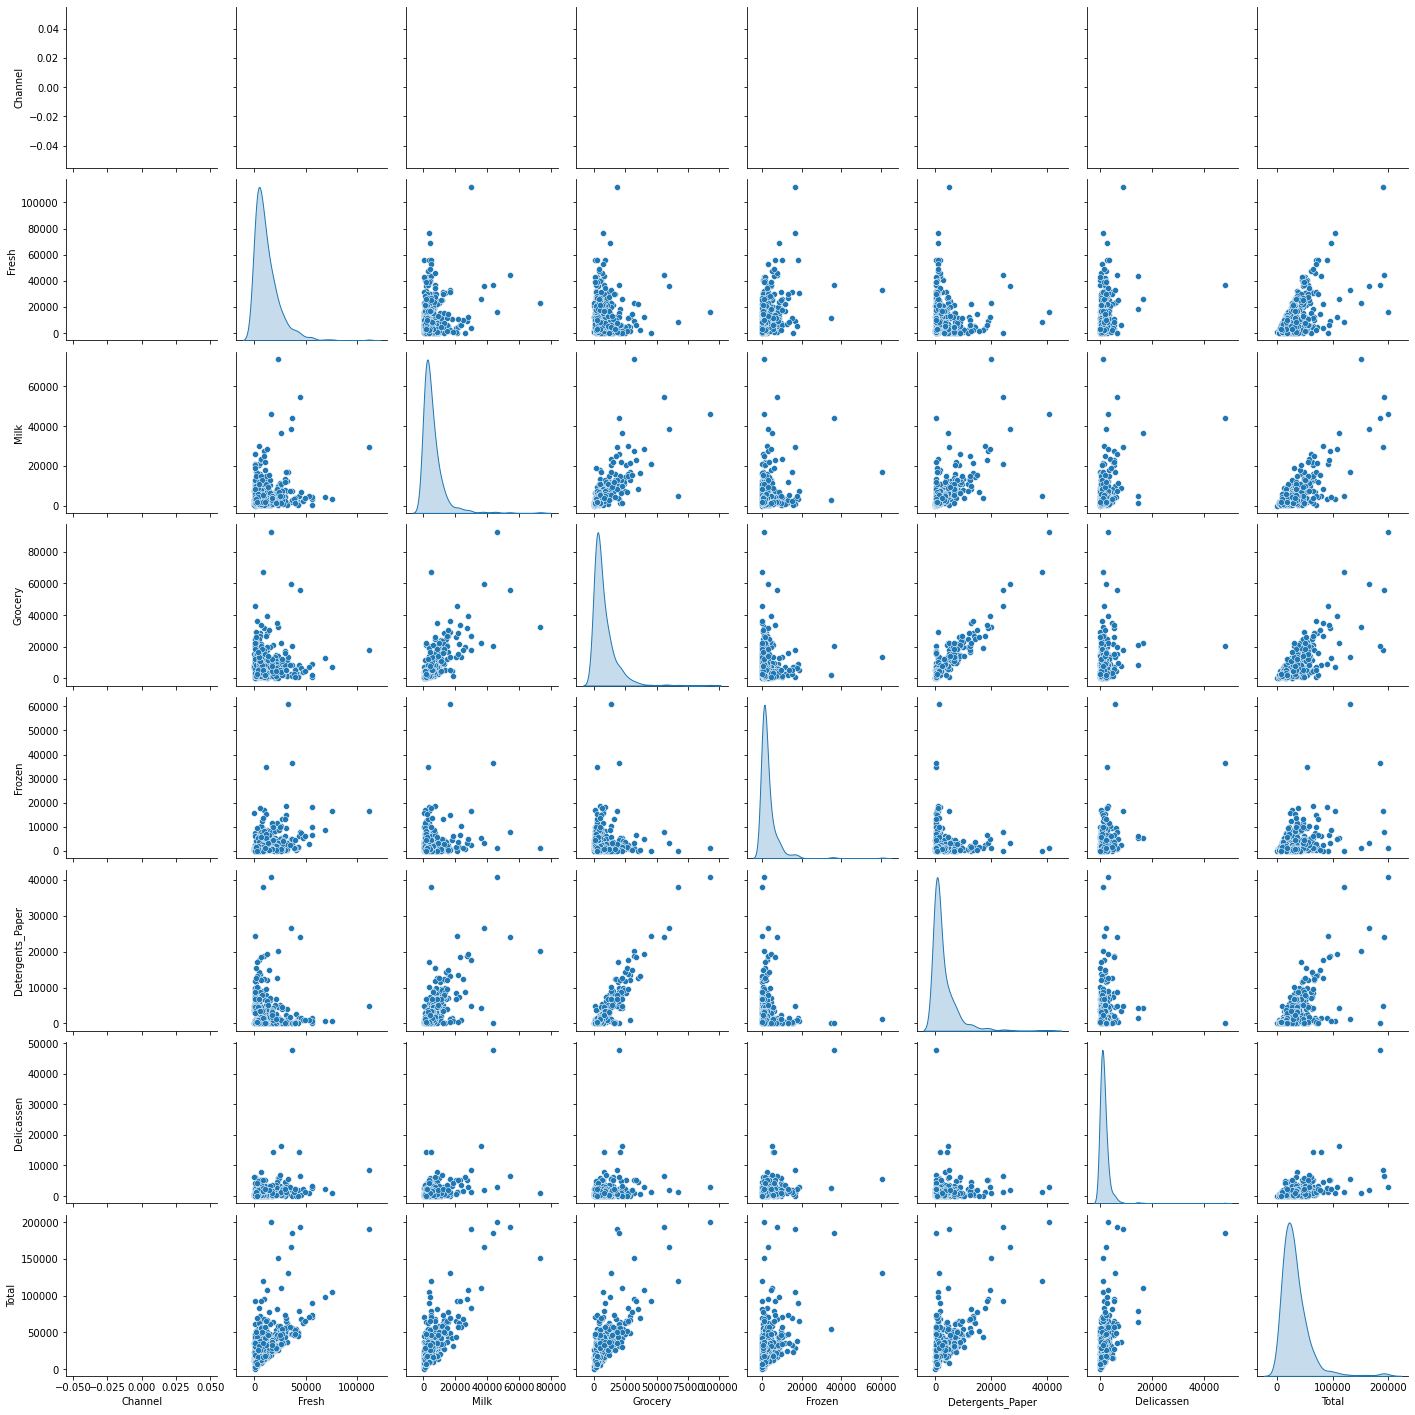

In [26]:
sns.pairplot(myData,diag_kind = 'kde')
plt.show()

It is a pair plot of our features described by different plots


In [32]:
fig = px.scatter(myData,x=myData['Fresh'], y=myData['Milk'],trendline="ols")
fig.show()

This diagram tells about the relationship between Milk and Fresh by scatterplot

In [33]:
fig = px.scatter(myData,x=myData['Frozen'], y=myData['Milk'],trendline="ols")
fig.show()

This diagram tells about the relationship between Milk and Froszen by scatterplot.

In [27]:
myData.drop(labels='Channel', axis=1, inplace=True)
myData.drop(labels='Region', axis=1, inplace=True)
myData.drop(labels='Total', axis=1, inplace=True)

In [28]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(myData)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## **Agglomerative Clustering**

In [29]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(myData)
normalized_df = normalize(scaled_df)

normalized_df = pd.DataFrame(data=normalized_df)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
g=X_principal.mean()
g.head()

P1    0.000000e+00
P2    1.513940e-18
dtype: float64

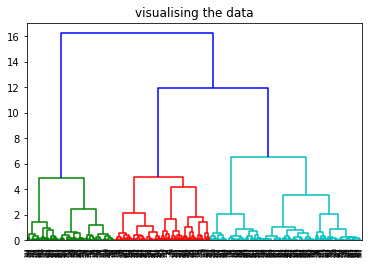

In [37]:
import scipy.cluster.hierarchy as shc
plt.title('visualising the data')

Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

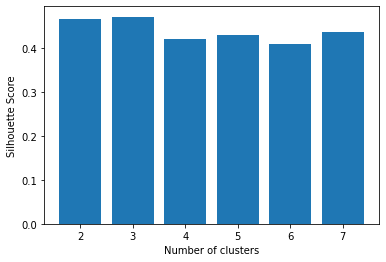

In [38]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [39]:
# creating and fitting model
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

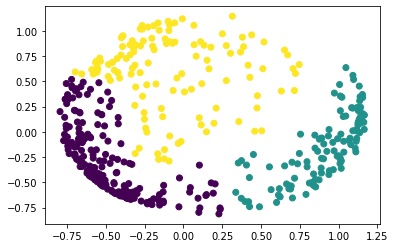

In [40]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal)) 
plt.show()